In [56]:
import matplotlib.pyplot as plt
import numpy as np
import random
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split

In [3]:
m1 = np.random.randint(101)
m2 = np.random.randint(101)
s = 5
test = np.random.normal(m1,s,100)
test2 = np.random.normal(m2,s,100)

m1 = np.random.randint(101)
m2 = np.random.randint(101)
test3 = np.random.normal(m1,s,100)
test4 = np.random.normal(m2,s,100)


total1 = np.concatenate((test, test3), axis=0)
total2 = np.concatenate((test2, test4), axis=0)

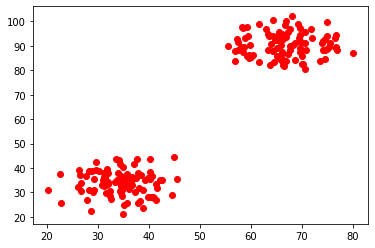

In [4]:
plt.plot(total1,total2,'ro')
plt.show()

In [72]:
def create_data(m_random_low,m_random_high,s,csize,size):
    m1 = random.randint(m_random_low,m_random_high)
    m2 = random.randint(m_random_low,m_random_high)
    total1 = np.random.normal(m1,s,size)
    total2 = np.random.normal(m2,s,size)
    for i in range(1,csize):
        m1 = random.randint(m_random_low,m_random_high)
        m2 = random.randint(m_random_low,m_random_high)
        test1 = np.random.normal(m1,s,size)
        test2 = np.random.normal(m2,s,size)


        total1 = np.concatenate((total1, test1), axis=0)
        total2 = np.concatenate((total2, test2), axis=0)
    return total1,total2

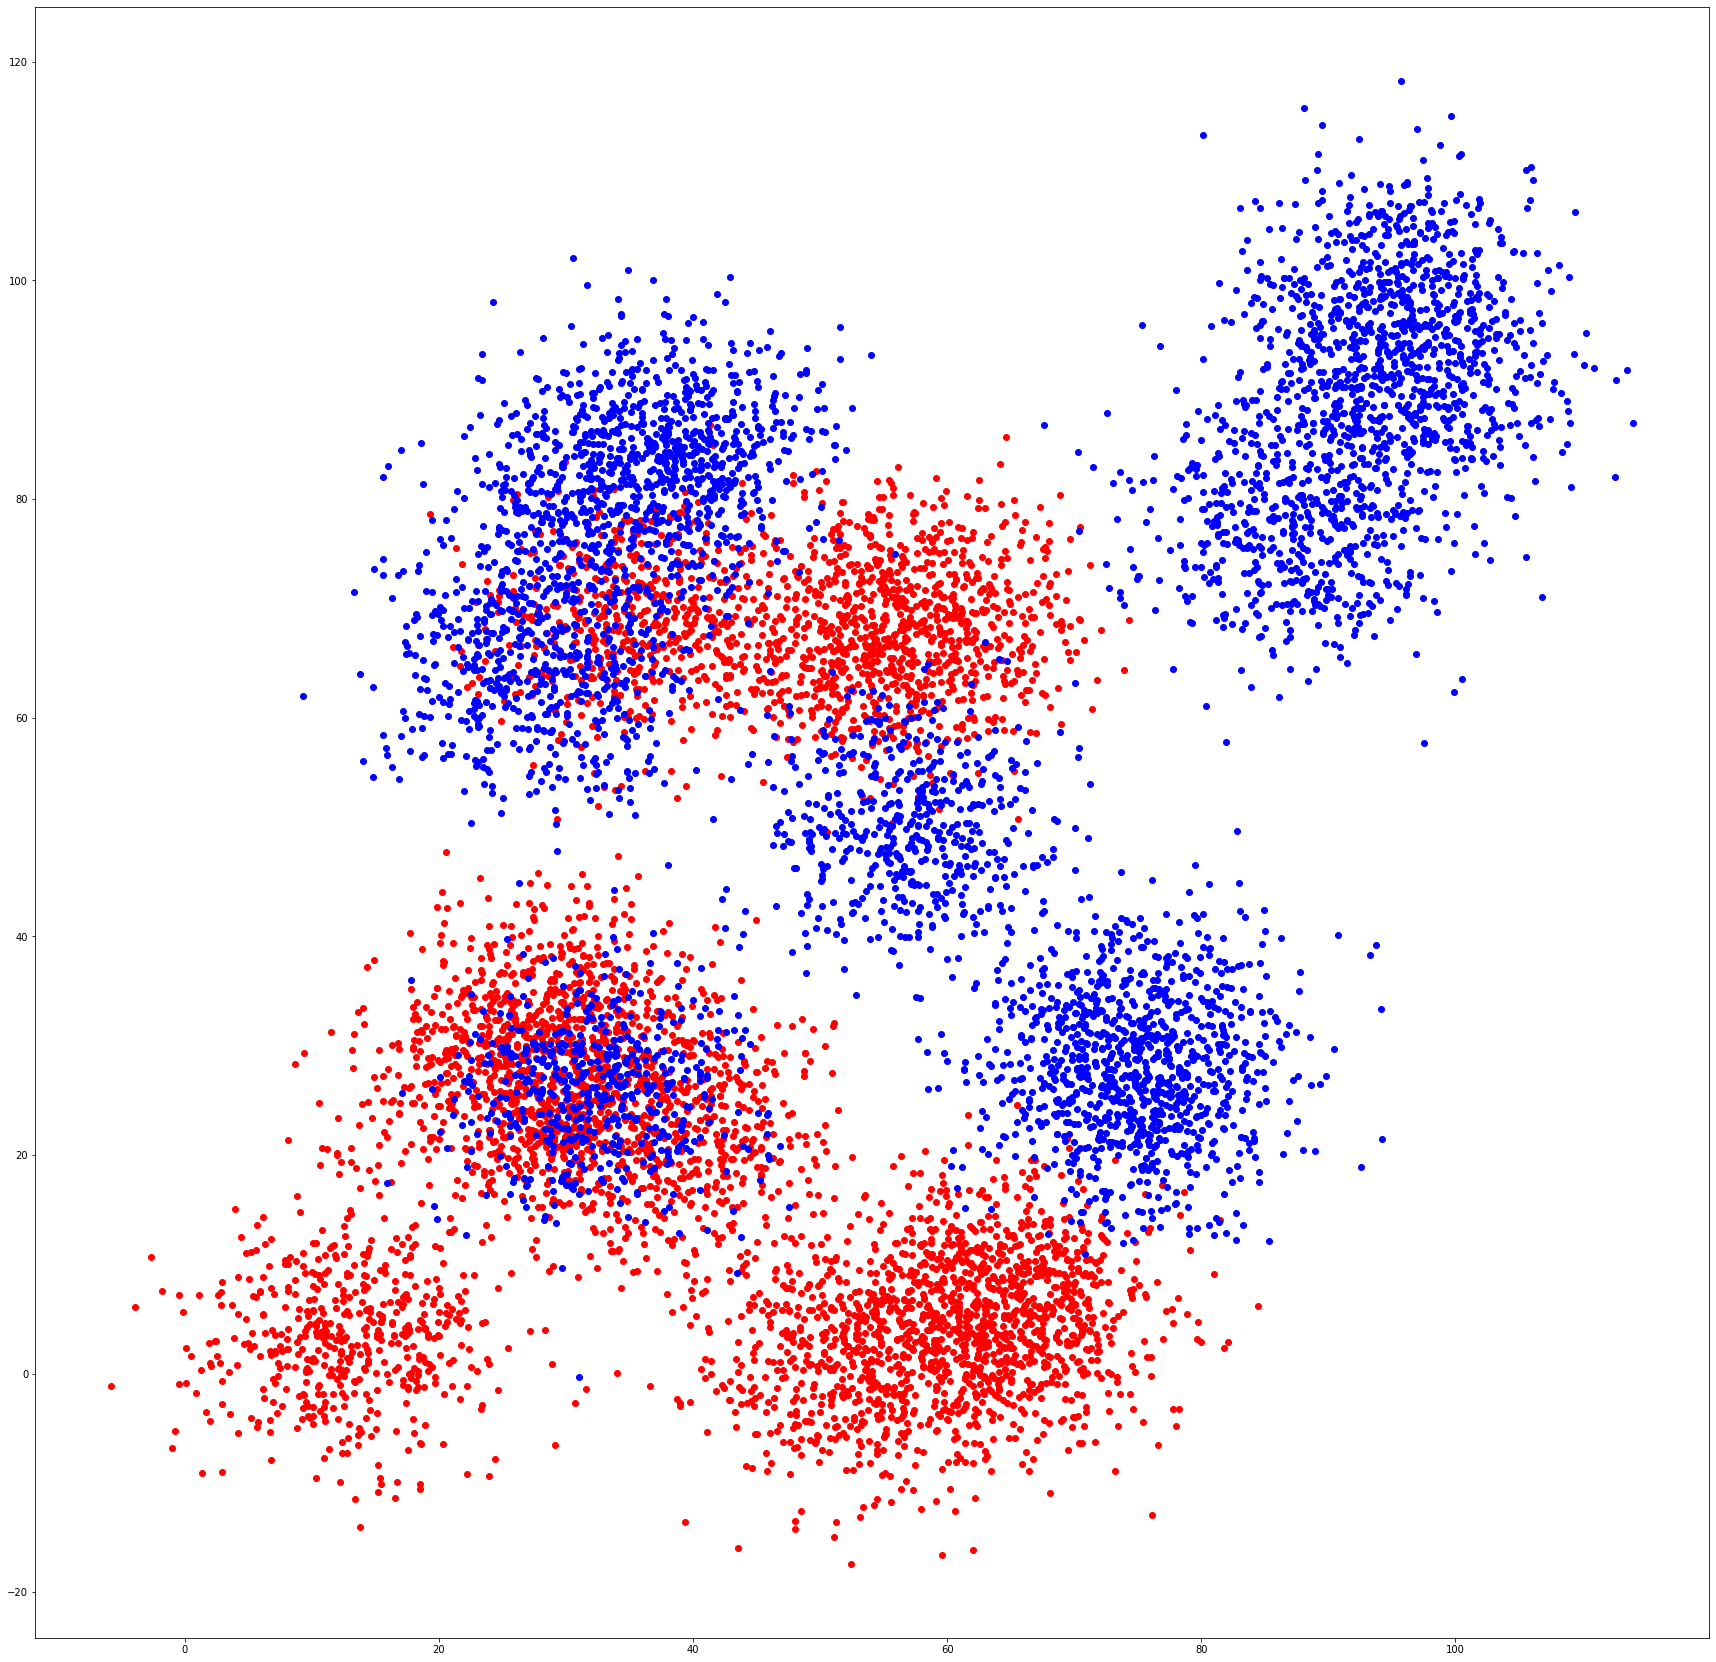

In [73]:
x1, x2 = create_data(0,75,6,10,510)
y1, y2 = create_data(25,100,6,10,510)
fig, axes = plt.subplots(1, 1)
plt.plot(x1,x2,'ro')
plt.plot(y1,y2,'bo')
fig.set_size_inches(30, 30)
plt.savefig('fig1.jpg')
plt.show()

In [74]:
data_X = np.zeros((10200,2))
data_y = np.zeros((10200,1))

In [75]:
data_X[0:5100,0] = x1
data_X[0:5100,1] = x2
data_X[5100:,0] = y1
data_X[5100:,1] = y2
data_y[0:5100] = 0
data_y[5100:] = 1

In [76]:
X_train, X_test, y_train, y_test = train_test_split(data_X, data_y, test_size=(200/10200), random_state=42)

In [77]:
X_test.shape

(200, 2)

In [78]:
regr = linear_model.LinearRegression()

In [79]:
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [80]:
error = 0
for i,test in  enumerate(X_test):
    predict = regr.predict([test])[0][0]
    if predict < .5:
        predict_score = 0.0
    else:
        predict_score = 1.0
    real_score = y_test[i][0]
    
    if real_score != predict_score:
        error += 1
print(error/200)

0.29


In [81]:
regr.coef_

array([[0.00487841, 0.00687122]])

In [82]:
regr.intercept_

array([-0.07339358])

In [83]:
x_plot = np.arange(start=-20, stop=120, step=.1)
y_plot = (.5 - regr.intercept_[0] - (x_plot * regr.coef_[0][0])) /  regr.coef_[0][1]

In [95]:
X_train[:,0]

array([52.37866337, 69.99511134, 46.4317759 , ..., 38.35362858,
       53.24411522, 90.13892811])

In [88]:
x1

array([43.91923064, 41.21849806, 42.87830942, ..., 49.17444402,
       54.93123561, 49.08575077])

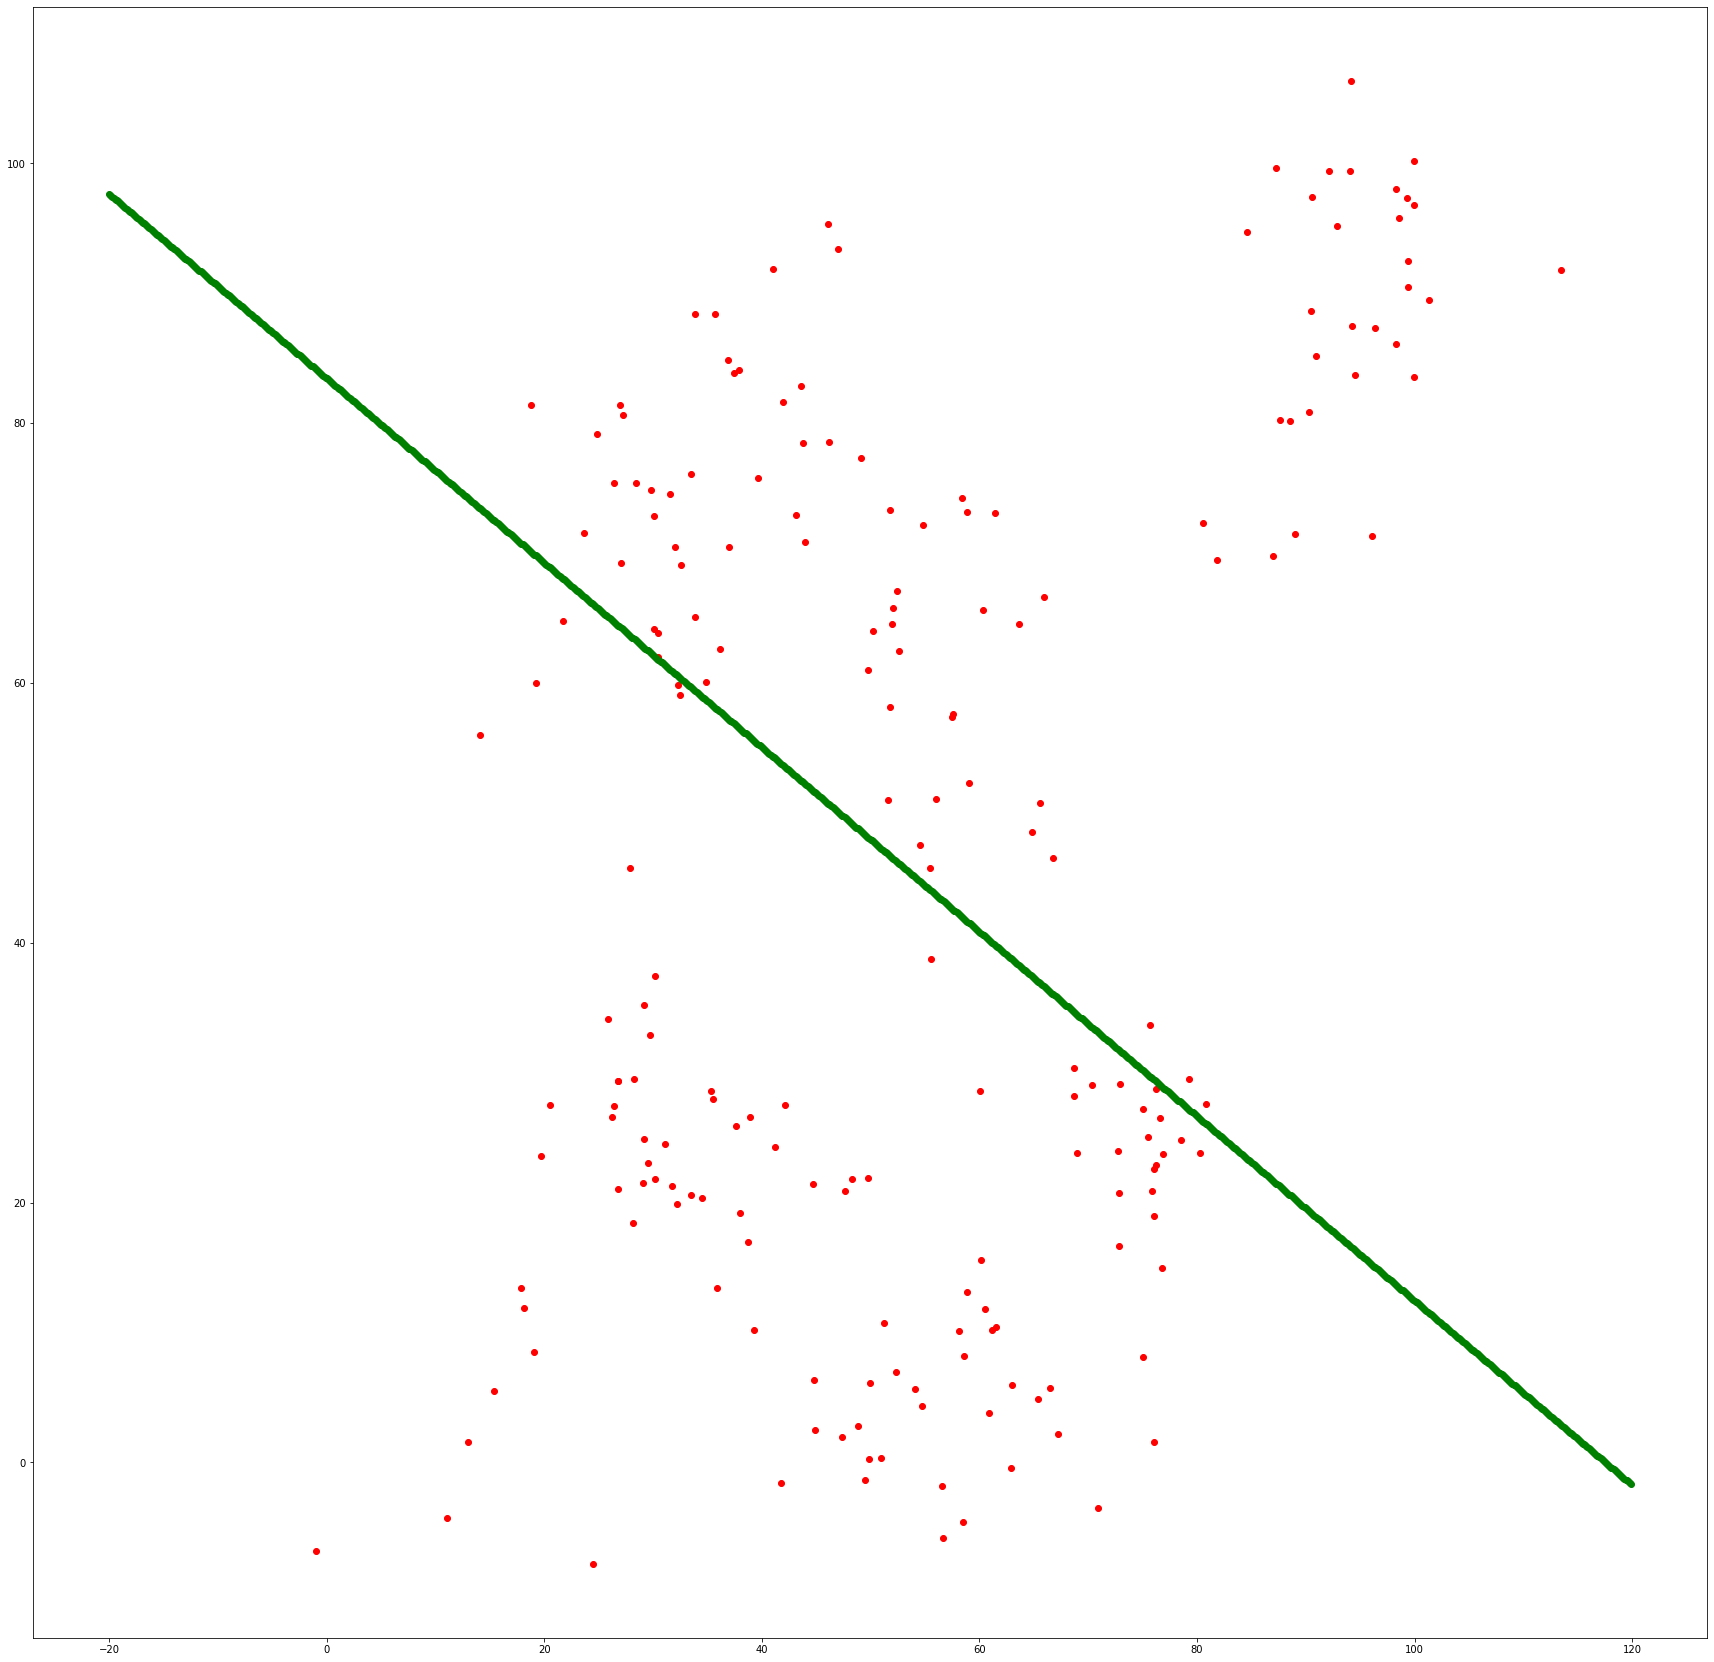

In [99]:
fig, axes = plt.subplots(1, 1)
#plt.plot(x1,x2,'ro')
#plt.plot(y1,y2,'bo')
plt.plot(X_test[:,0],X_test[:,1],"ro")
plt.plot(x_plot,y_plot,'go')
fig.set_size_inches(30, 30)
plt.savefig('fig1.jpg')
plt.show()